# Integración numérica ("cuadratura")

A menudo en la física, es necesario evaluar integrales feas. [La verdad es que casi todas las integrales son feas...] Mientras que la diferenciación es un proceso que se puede llevar a cabo de manera algorítmica, siguiendo una receta, la integración no lo es. De hecho, se puede demostrar que hay integrales que no se pueden llevar a cabo de forma analítica en términos de las funciones elementales; un ejemplo famoso, y de suma importancia, es la llamada [función error](https://es.wikipedia.org/wiki/Funci%C3%B3n_error), dada por

$$\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^x e^{-t^2} \, dt,$$

la cual está estrechamente relacionada con la probabilidad de eventos para una variable aleatoria distribuida de forma normal (gaussiana).

Por lo tanto, necesitamos encontrar maneras de aproximar integrales definidas, de forma numérica.

Recordemos que la integral 

$$I(f) = \int_a^b f(x) \, dx$$ 

representa el **área debajo de la curva $y=f(x)$ entre $x=a$ y $x=b$**. Por lo tanto, la integración numérica también se llama "cuadratura numérica". [Ver, por ejemplo, https://es.wikipedia.org/wiki/Cuadratura_del_c%C3%ADrculo.] Por lo tanto, da una manera de aproximar numéricamente una **integral de Riemann**.

Nota que la integral $I(f)$ es una función [de hecho, un "funcional"] **lineal** de $f$. Por lo tanto, buscaremos métodos numéricos con la misma propiedad. Siguiendo la pista que vimos en el notebook sobre la interpolación, pensamos en **discretizar** (por supuesto). Una forma de hacerlo es evaluar la función $f$ en $N+1$ **nodos** $x_j$, y buscaremos **pesos** $\alpha_i$ que den una aproximación a la integral de la forma

$$Q(f) = \sum_{i=0}^N \alpha_j \, f(x_j), \qquad  (*)$$

es decir como una suma ponderada de los valores de la función en los nodos.

#### Ejercicio 1

Un caso particular es una $f$ que sea **monótona**, por ejemplo el integrando $f$ que aparece en la función $\mathrm{erf}$, dado por $f(x) = e^{-x^2/2}$. 

(i) La idea más natural [pero ¡no necesariamente mejor!] es dividir el intervalo $[0, x]$ en $N$ intervalos iguales de longitud $h=1/N$. Dada una $x$ y una $N$, dibuja la función, así como líneas verticales punteadas [dibujar con `linestyle=:dash`] en los nodos.
Grafícalo.

In [1]:
using Plots

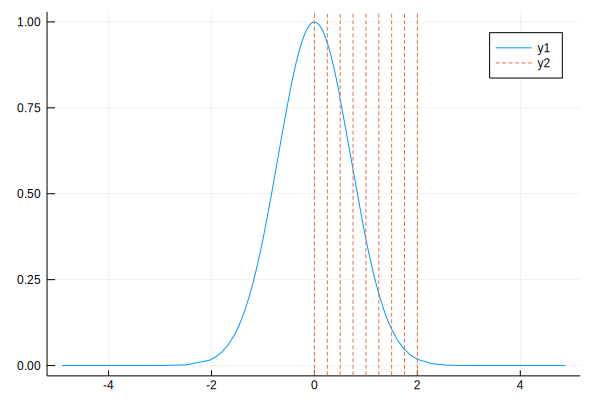

In [5]:
f(x) = exp(-x^2)

plot(f)

xx = 0:0.25:2

vline!(xx, ls=:dash)

In [21]:
using Interact

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/a1b73b8a610c7572f4a81a27d42ecc3e3a054c7e-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/a1b73b8a610c7572f4a81a27d42ecc3e3a054c7e-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [46]:
f(x) = exp(-x^2)


@manipulate for N in 1:100
    xx = collect(range(0, stop=2, length=N))
    
    h = xx[2] - xx[1]

    plot(f, leg=false)

    for x in xx
        plot!([x, x], [0, f(x)], ls=:dash, c=:black, alpha=0.5)
        plot!([x, x+h], [f(x+h), f(x+h)], 
            ls=:dash, c=:black, alpha=0.1, fill=(0, f(x), :orange))
        plot!([x, x+h], [f(x), f(x)], 
            ls=:dash, c=:black, alpha=0.1, fill=(0, :blue))#fill=(0, f(x), :blue))
    end
    
    inferior = round(h * sum(f(x) for x in xx[2:end]), digits=5)
    superior = round(h * sum(f(x) for x in xx[1:end-1]), digits=5)
    
    title!("integral en [$inferior, $superior]")
end    


Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:N=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
50), Observable{Int64} with 2 listeners. Value:
50, Scope("knockout-component-32210db4-c719-4a02-a17f-74f257c926ba", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["N"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>100,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/dpsanders/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/Users/dpsanders/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/Users/dpsanders/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":50}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-32210db4-c719-4a02-a17f-74f257c926ba\",\"id\":\"ob_81\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-32210db4-c719-4a02-a17f-74f257c926ba\",\"id\":\"ob_80\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n

In [30]:
using Interact, WebIO

el1 = button("Hello world!")
el2 = button("Goodbye world!")

el3 = hbox(el1, el2) # aligns horizontally
#el4 = hline() # draws horizontal line
#el5 = vbox(el1, el2) # aligns vertically

(div { style=Dict("display"=>"flex","flex-direction"=>"row") }
  (div { className="field" }
        (button { attributes=Dict{Any,Any}("data-bind"=>"click : function () {this.clicks(this.clicks()+1)}") className="button is-primary" style=Dict{String,Any}() }
      "Hello world!"))
  (div { className="field" }
        (button { attributes=Dict{Any,Any}("data-bind"=>"click : function () {this.clicks(this.clicks()+1)}") className="button is-primary" style=Dict{String,Any}() }
      "Goodbye world!")))

(ii) La idea más sencilla es aproximar la función $f$ en un intervalo dado con una recta horizontal. 
¿Cómo podríamos calcular tanto una cota inferior como una cota superior, suponiendo que $f$ es monótona? Exprésalos en la forma de la ecuación (*). Grafícalos.

Escribe una función que calcule estas áreas dadas $f$ (monótona), $a$, $b$ y $N$.

(iii) ¿Cuál es la tasa de convergencia hacia el resultado exacto cuando $N \to \infty$ para $f(x) = e^{-x^2/2}$? [Pista: La función $\mathrm{erf}$ en Julia se llama... `erf`. Se encuentra en el paquete `SpecialFunctions.jl`.]

#### Ejercicio 2

(i) Dibuja las cotas inferior y superior para $\mathrm{erf}(x)$, como función de $x$.

(ii) Encuentra una cota superior analítica para $\int_{t=x}^\infty e^{-t^2/2} dt$. [Pista: puedes utilizar, por ejemplo, $f(t) \le e^{-t}$ para $t$ suficientemente grande. [¿Qué tan grande?].] 

(iii) Así, encuentra cotas para $\lim_{x \to \infty} \mathrm{erf}(x)$. ¿Cuál valor analítica tiene? Así, podemos encontrar cotas para integrales con rango infinito.

#### Ejercicio 3

(i) Para funciones $f$ que no sean monótonas, ¿qué necesitaríamos poder hacer para encontrar cotas inferiores y superiores para $\int_a^b f$? [Esto es bastante más difícil. Se puede lograr utilizando la **aritmética de intervalos**, por ejemplo.]

(ii) Después de una recta horizontal, ¿cuál es la siguiente forma más natural de aproximar a la función $f$ adentro de un intervalo dado? ¿A qué aproximación de la integral lleva, expresada en la forma de la ecuación (*)? Grafícalo.  Este método se llama el **método del trapecio**.

(iii) Impleméntalo. Nota que este método funciona para *cualquier* función $f$, sin que tenga que ser monótona. 

(iv) Aplícalo a algunas funciones cuyas integrales conoces y encuentra la 
tasa de convergencia. ¿Cómo se compara con el método de la pregunta [1]?

#### Ejercicio 4

Lo que estamos haciendo es aproximar la función $f$ en cada sub-intervalo. La siguiente aproximación es una cuadrática, la cual lleva a una regla llamada el **método de Simpson**.

(i) Utiliza el método de interpolación de Lagrange para encontrar una expresión analítica para un polinomio que interpola la función $f$ en tres puntos: $x_i$, $x_{i+1}$, y el punto medio $m$ entre $x_i$ y $x_{i+1}$.

(ii) Integra este polinomio para encontrar $\int_{x_i}^{x_{i+1}} f(t) \, dt$. 

(iii) Así, encuentra una aproximación para $\int_{a}^{b} f(t) \, dt$.

(iv) Encuentra numéricamente la tasa de convergencia del método.

## Métodos más avanzados 

Hay métodos muy precisos, por ejemplo la llamada **cuadratura de Gauss**, que funcionan si la función es suave. En estos métodos, se puede utilizar la interpolación de Lagrange para aproximar una función con un polinomio *globalmente* en todo el rango $[a,b]$, y luego ¡se integra el polinomio! La dificultad es en escoger dónde deberían ser los nodos $x_i$.

[¡Esto podría ser un proyecto final interesante!]

Estos métodos se pueden extender a integrales en más dimensiones.